# Time Series Analysis

## Load Libraries

In [2]:
#load Libraries
import pandas as pd
import numpy as np
import seaborn as seaborn
import matplotlib.pyplot as plt
import matplotlib as mp1
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import folium
from sklearn import metrics
from mpl_toolkits.basemap import Basemap
from sklearn import metrics
import itertools
import os

## Load Sales Data

In [70]:
## Define a function to load all the files from a specific folder
def loadFiles(myPath):
    a=1
    salesFilesPath = [x for x in os.listdir(myPath)]
    
    for dataFile in salesFilesPath:
        print("Loading file: " + dataFile)
        tmpSales_df = pd.read_csv(myPath + "\\" + dataFile,low_memory=False)
        if a == 1 :
            sales_df = tmpSales_df
            a=0
            #print("Stored")
        else:
            sales_df = sales_df.append(tmpSales_df, ignore_index=True)
            #print("Append")
    return sales_df
    
salesTs_df=loadFiles("C:\\Users\\Eduardo Cantu\\Documents\\Masters\\CapstoneA\\Data\\JupyterNotebooks\\Data")

Loading file: Sales_Data_1.1.09_ 12.31.09.csv
Loading file: Sales_Data_1.1.10_ 12.31.10.csv
Loading file: Sales_Data_1.1.11_ 12.31.11.csv
Loading file: Sales_Data_1.1.12_ 12.31.12.csv
Loading file: Sales_Data_1.1.13_ 12.31.13.csv
Loading file: Sales_Data_1.1.14_ 12.31.14.csv
Loading file: Sales_Data_1.1.15_ 12.31.15.csv
Loading file: Sales_Data_1.1.16_ 12.31.16.csv
Loading file: Sales_Data_1.1.17_ 12.31.17.csv
Loading file: Sales_Data_1.1.18_ 12.31.18.csv


### Data Types

In [63]:
salesTs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539867 entries, 0 to 539866
Data columns (total 24 columns):
Invoice#         539855 non-null object
Invoice Type     528838 non-null object
Customer#        539855 non-null object
Customer Name    539852 non-null object
SO#              455396 non-null object
Ship Address     538609 non-null object
Ship Zipcode     455843 non-null object
Fab Mat Cost     539867 non-null object
FGHO Mat Cost    539867 non-null float64
BOL              537300 non-null object
Freight          539866 non-null float64
Location         539854 non-null object
Ship Date        539866 non-null object
Master#          539783 non-null object
Description      539843 non-null object
Qty              539865 non-null float64
Price Descrip    539681 non-null object
SRV              539865 non-null object
FGHO             539865 non-null object
Price each       539865 non-null float64
MaterialCost     539865 non-null float64
HT Lumber        539865 non-null object
Labo

#### Features of interest
__Ship Date__: This is to be use as the time component  
__Price each__: This can be aggregated by date as cashflow or income per date

In [64]:
salesTs_df.head()

,Invoice#,Invoice Type,Customer#,Customer Name,SO#,Ship Address,Ship Zipcode,Fab Mat Cost,FGHO Mat Cost,BOL,...,Description,Qty,Price Descrip,SRV,FGHO,Price each,MaterialCost,HT Lumber,Labor,Release Type
0,A75545,All Other,A15216,Applied Materials- Inc - Crating,NaN,Sales Order Number Hours,NaN,0,0.0,NaN,...,Professional Fees - Corporate Packaging Engine...,40.0,pcs,False,False,55.00,0.000,False,0.000,NaN
1,W225343,HT Lumber,210,York International,W84192,5005 Interstate Dr- North,73069,401.33,0.0,W79753,...,P/N 9836* 030-50335 Rev C,20.0,pcs,False,False,16.43,9.060,True,3.263,Blanket Order
2,W225343,HT Lumber,210,York International,W84179,5005 Interstate Dr- North,73069,401.33,0.0,W79753,...,P/N 9807* 030-50291-B Rev A,10.0,pcs,False,False,42.52,22.013,True,11.475,Blanket Order
3,W225344,HT Lumber,210,York International,W99801,5005 Interstate Dr- North,73069,680.54,0.0,W79754,...,P/N 9890-T* 90 x 44 x 11-1/4 ID (T) Crate W...,2.0,pcs,False,False,131.93,63.585,True,6.300,Single Shipment
4,W225344,HT Lumber,210,York International,W100090,5005 Interstate Dr- North,73069,680.54,0.0,W79754,...,P/N 430481* 55 x 18 x 51 ID Multi Crate *8 C...,2.0,pcs,False,False,194.00,101.845,False,21.938,Single Shipment


### Remove Duplicates
_Evaluate if these duplicates are valid or not before deleting them_

In [65]:
#Print shape before duplicate removal
print("Data Shape before duplicate Removal:", salesTs_df.shape)

Data Shape before duplicate Removal: (539867, 24)


In [66]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = salesTs_df[salesTs_df.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
       Invoice#   Invoice Type Customer#  \
245     M211133      All Other    M16020   
2602    W225786      All Other       100   
2603    W225786      All Other       100   
2604    W225786      All Other       100   
2606    W225786      All Other       100   
2607    W225786      All Other       100   
2608    W225786      All Other       100   
2611    W225786      All Other       100   
2612    W225786      All Other       100   
3084    W225869      HT Lumber       210   
3677    M211841      All Other    M16020   
4996    W226186     Corrugated       100   
5010     A75758     Corrugated     A1740   
6176    M212610     Corrugated    M16026   
6178    M212610     Corrugated    M16026   
6179    M212610     Corrugated    M16026   
8793    M213360      All Other    M16020   
9301    W226776      All Other       100   
9646    M213542     Corrugated    M16065   
12776    A76691  FGHO/Supplies    A15902   
13686   W2

In [34]:
## Section to Delete the duplicates from the main dataset

### Data Description

#### Categorical Information
Observations from the data:
    * There are 3922 rows with no date. These rows can be deleted.  
    * SRV and FGHO fields can be removed. All the values are False
    

In [71]:
# Describe the Categorical Objects
list_include = ['object']
salesTs_df.describe(include=list_include).T

,count,unique,top,freq
Invoice#,539855,253975,W272894,93
Invoice Type,528838,13,All Other,232010
Customer#,539855,1289,A15216,80519
Customer Name,539852,1407,Applied Materials- Inc - Crating,80519
SO#,455396,154226,W108342,1451
Ship Address,538609,11787,76 N. Meridian Avenue,49946
Ship Zipcode,455843,2185,78728,54528
Fab Mat Cost,539867,65440,0,65883
BOL,537300,234294,EOM,4146
Location,539854,6,Austin,217757


In [73]:
# Remove the rows or observations with date = 00/00/00
salesTs_df = salesTs_df[salesTs_df['Ship Date'] != "00/00/00"]

In [74]:
# Describe the Categorical Objects after removing the rows with date = 00/00/00
list_include = ['object']
salesTs_df.describe(include=list_include).T

,count,unique,top,freq
Invoice#,535945,252219,W272894,93
Invoice Type,527083,13,All Other,231003
Customer#,535945,1284,A15216,80287
Customer Name,535942,1401,Applied Materials- Inc - Crating,80287
SO#,453765,154175,W108342,1451
Ship Address,535039,11784,76 N. Meridian Avenue,49938
Ship Zipcode,452301,2184,78728,54486
Fab Mat Cost,535945,65150,0,65443
BOL,534418,234201,EOM,4146
Location,535944,6,Austin,217212


#### Numerical Data
_Evaluate from these data is what would need to be forecast. There are negative values on prices should these be deleted?_

In [55]:
# Describe the Float Objects
list_include = ['float64','int64']
salesTs_df.describe(include=list_include).T

,count,mean,std,min,25%,50%,75%,max
FGHO Mat Cost,535945.0,391.981847,1949.947109,-594000.00,0.00,0.000,314.26,594000.00
Freight,535944.0,1.007838,18.444805,-1716.26,0.00,0.000,0.00,2720.27
Qty,535943.0,304.587193,5653.807236,-267300.00,2.00,18.000,70.00,944460.00
Price each,535943.0,84.568970,933.388621,-373437.83,2.74,13.760,53.57,373437.83
MaterialCost,535943.0,33.021042,207.720964,-1650.00,1.05,5.655,21.52,41175.49
Labor,535943.0,1.289367,7.859906,0.00,0.00,0.000,0.00,1016.50


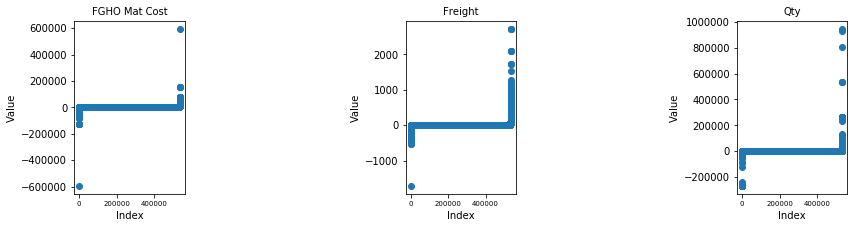

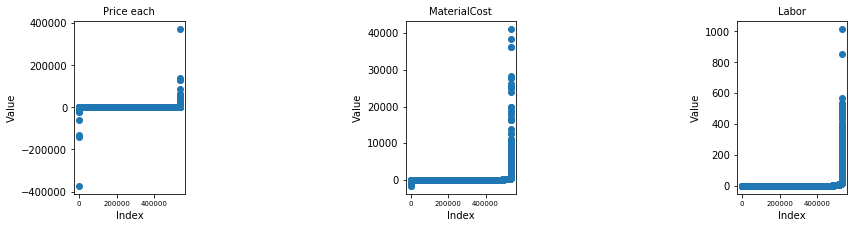

In [56]:
# Verify all float values
list_include = ['float64','int64']
i=1
for col in salesTs_df.select_dtypes(include=list_include).columns:
    if i<=3:
        #plt.figure(figsize=(10,4))
        plt.subplot(1,3,i)
        plt.scatter(range(salesTs_df.shape[0]),np.sort(salesTs_df[col].values))
        plt.xlabel('Index', size=10)
        plt.title(col, size=10)
        plt.ylabel('Value', size=10)
        plt.xticks(size=7)
        i = i + 1
    else:
                
        plt.subplots_adjust(top=1, bottom=0.4, left=0.01, right=1.8, hspace=0.25, wspace=2)
        plt.show()
        
        i=1
        plt.subplot(1,3,i)
        plt.scatter(range(salesTs_df.shape[0]),np.sort(salesTs_df[col].values))
        plt.xlabel('Index', size=10)
        plt.title(col, size=10)
        plt.ylabel('Value', size=10)
        plt.xticks(size=7)
        i = i + 1
        
        
        

plt.subplots_adjust(top=1, bottom=0.4, left=0.01, right=1.8, hspace=0.25, wspace=2)
plt.show() 

### Missing Values

There are no considerable number of missing values in the _Ship Date_ or _Price each_ columns that would need estimation.

In [57]:
# Missing Values
dtype_df=salesTs_df.dtypes.reset_index()
dtype_df.columns=["Count","ColumnType"]
dtype_df.groupby("ColumnType").aggregate('count').reset_index()
missing_df=salesTs_df.isnull().sum(axis=0).reset_index()
missing_df.columns=['ColumnName','MissingCount']
missing_df=missing_df.ix[missing_df['MissingCount']>0]
missing_df=missing_df.sort_values(by='MissingCount')

missing_df = missing_df.merge(dtype_df,left_on = 'ColumnName', right_on = 'Count', how= 'left')
missing_df

D:\Masters\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


,ColumnName,MissingCount,Count,ColumnType
0,Freight,1,Freight,float64
1,Location,1,Location,object
2,Ship Date,1,Ship Date,object
3,HT Lumber,2,HT Lumber,object
4,MaterialCost,2,MaterialCost,float64
5,Labor,2,Labor,float64
6,Qty,2,Qty,float64
7,SRV,2,SRV,object
8,FGHO,2,FGHO,object
9,Price each,2,Price each,float64


### Summary

In [106]:
# Order Sum by day

## Time Series for Price each 

priceTs_df = salesTs_df[['Ship Date',
                        'Price each']]

priceTs_df['Ship Date'] =  pd.to_datetime(priceTs_df['Ship Date'])

order_sum_df=priceTs_df.groupby(['Ship Date']).sum().reset_index().sort_values(by=(['Ship Date']))
sales_sum_df=order_sum_df.set_index('Ship Date')

sales_sum_df['Year'] = sales_sum_df.index.year
sales_sum_df['Month'] = sales_sum_df.index.month
sales_sum_df['WeekdayName'] = sales_sum_df.index.weekday_name
sales_sum_df.head()

D:\Masters\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Price each,Year,Month,WeekdayName
Ship Date,,,,
2000-03-01,2.10,2000,3,Wednesday
2001-04-29,22.46,2001,4,Sunday
2008-11-26,0.25,2008,11,Wednesday
2009-01-04,55.00,2009,1,Sunday
2009-01-05,4392.80,2009,1,Monday


In [112]:
## Remove dates outside the range provided
sales_sum_df = sales_sum_df[(sales_sum_df.index >= '2009-1-1') & (sales_sum_df.index <= '2018-12-31')]

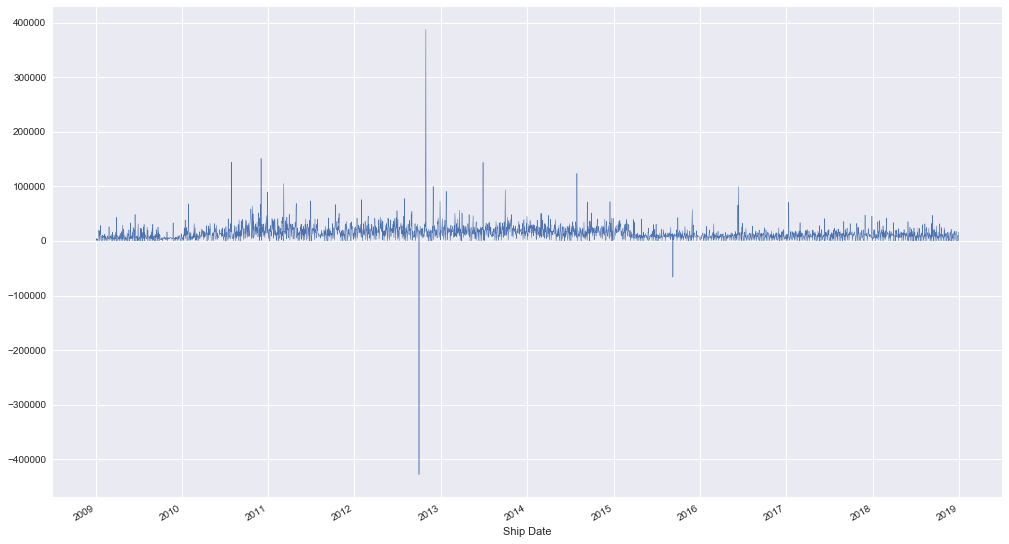

In [97]:
seaborn.set(rc={'figure.figsize':(17, 10)})
sales_sum_df['Price each'].plot(linewidth=0.5);

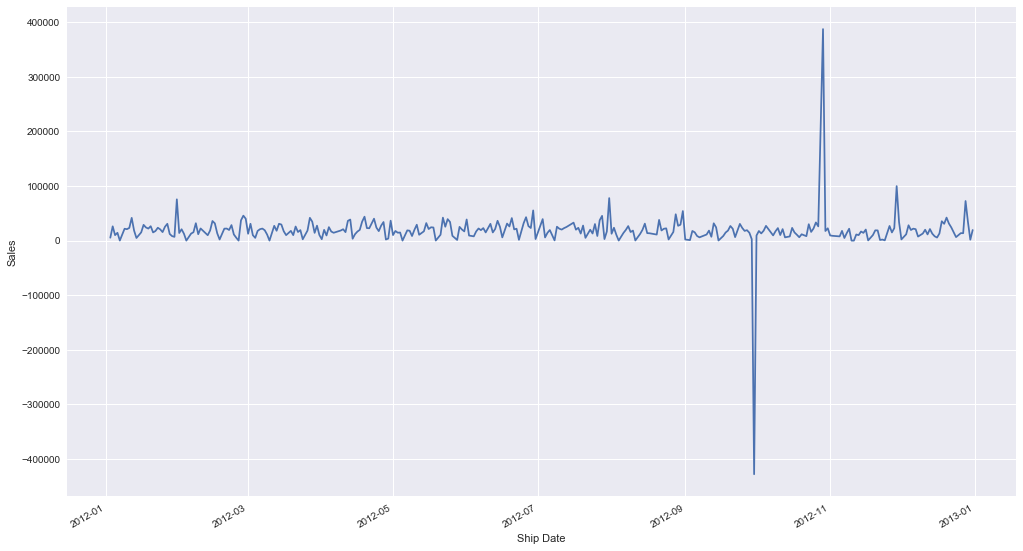

In [107]:
ax = sales_sum_df.loc['2012', 'Price each'].plot()
ax.set_ylabel('Sales');

In [108]:
sales_sum_df[sales_sum_df['Price each'] > 300000]

,Price each,Year,Month,WeekdayName
Ship Date,,,,
2012-10-29,387463.65,2012,10,Monday


In [109]:
sales_sum_df[sales_sum_df['Price each'] < 0]

,Price each,Year,Month,WeekdayName
Ship Date,,,,
2012-09-30,-427899.3800,2012,9,Sunday
2015-09-09,-66254.1625,2015,9,Wednesday


In [110]:
## Remove the dates with issues
sales_sum_df=sales_sum_df[sales_sum_df['Price each'] < 300000]

sales_sum_df=sales_sum_df[sales_sum_df['Price each'] > 0]

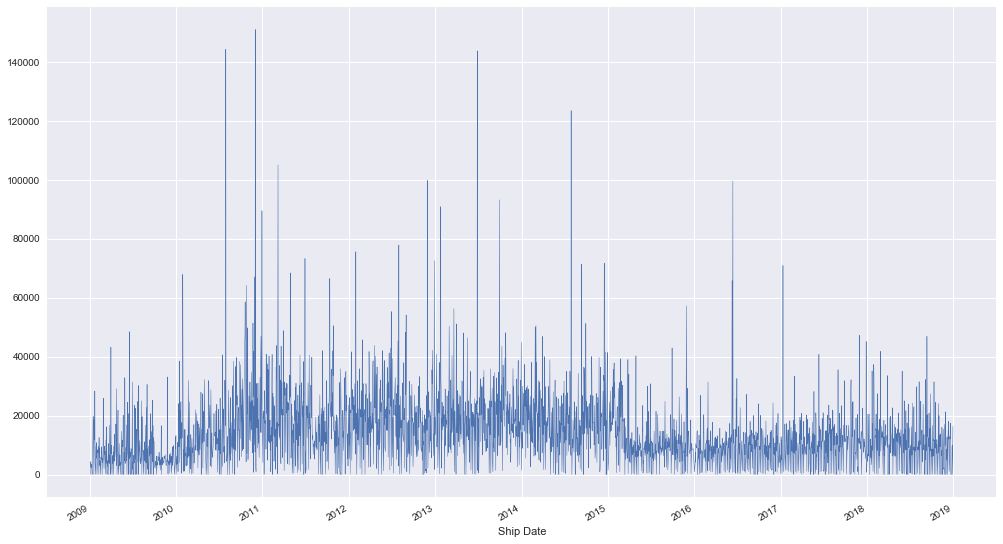

In [113]:
seaborn.set(rc={'figure.figsize':(17, 10)})
sales_sum_df['Price each'].plot(linewidth=0.5);

### Monthly Aggregate

In [114]:
y = sales_sum_df['Price each'].resample('MS').sum()

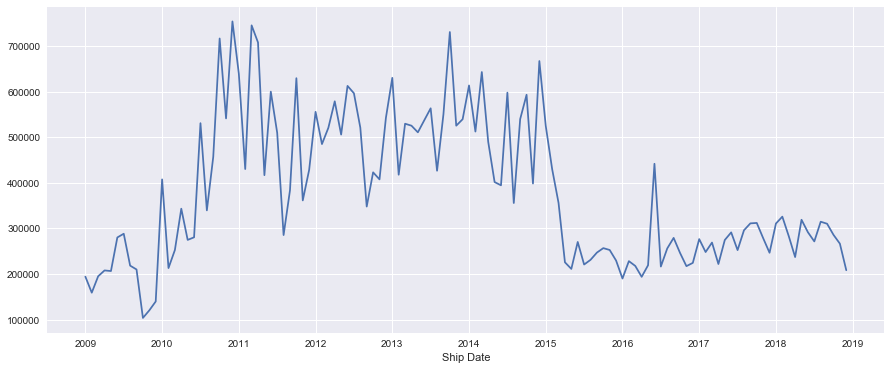

In [115]:
y.plot(figsize=(15, 6))
plt.show()

### Decomposition of the trend


D:\Masters\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


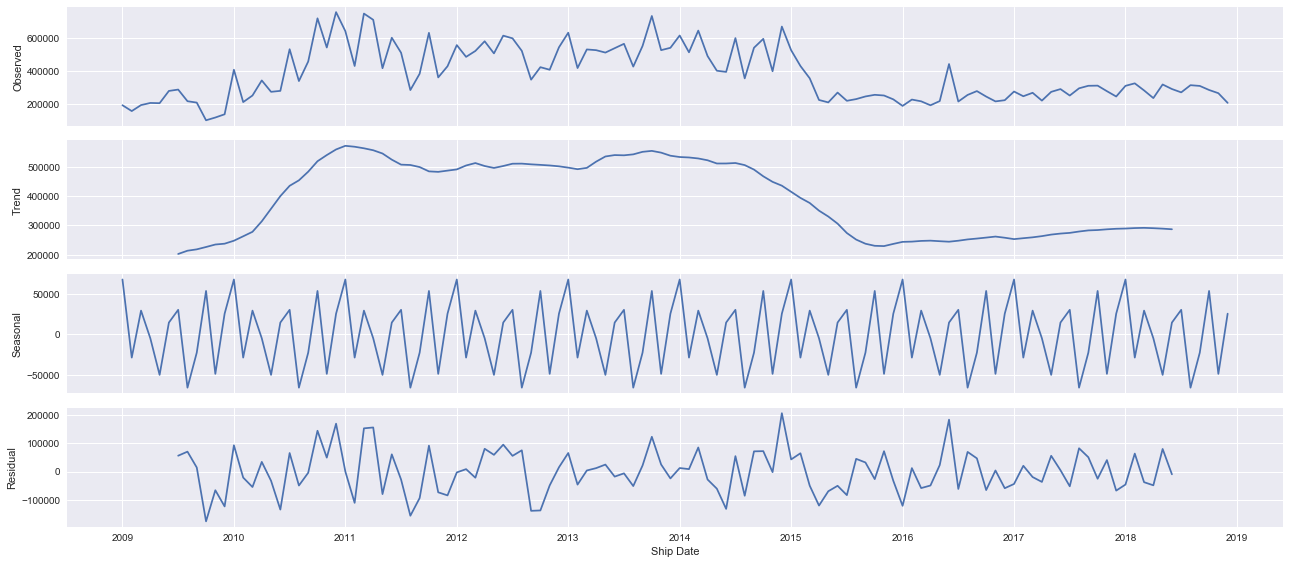

In [117]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()